# Analysis
**1. With a correlation of 0.84, there is a strong positive correlation between average tumor volume and weight within the subject mice. 
**2. Capomulin and Ramicane had the most data points out of all the drugs present in the study. 
**3. Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects.

In [96]:
 # Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")
merged_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = merged_df.groupby('Drug Regimen')
stats = summary_table.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stats

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

<IPython.core.display.Javascript object>


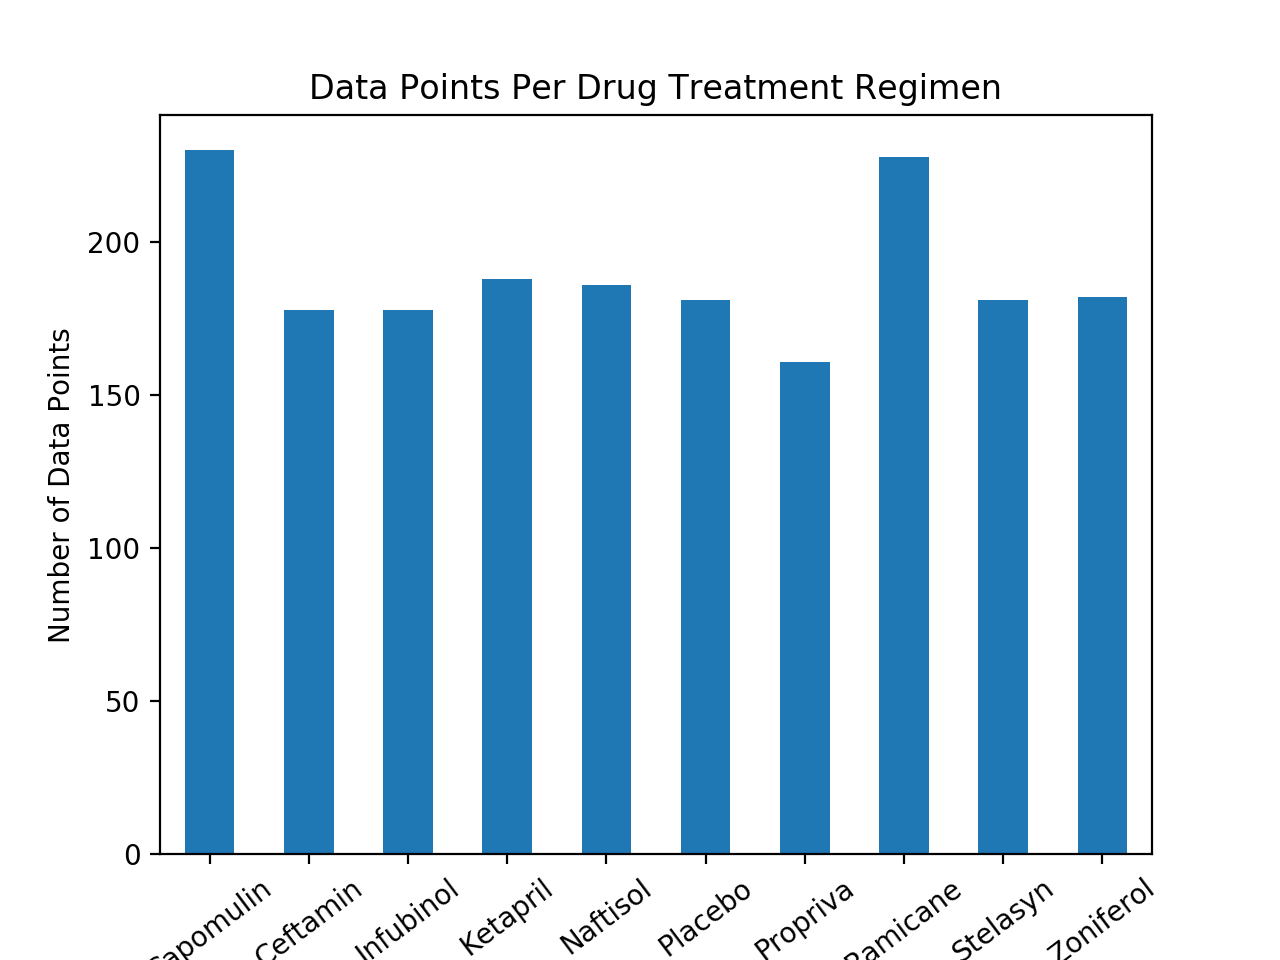

Text(0.5, 1.0, 'Data Points Per Drug Treatment Regimen')

In [149]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapts = merged_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']

panbar = pd.DataFrame(datapts)
also = panbar.plot.bar(legend=False,rot=37)
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")



<IPython.core.display.Javascript object>


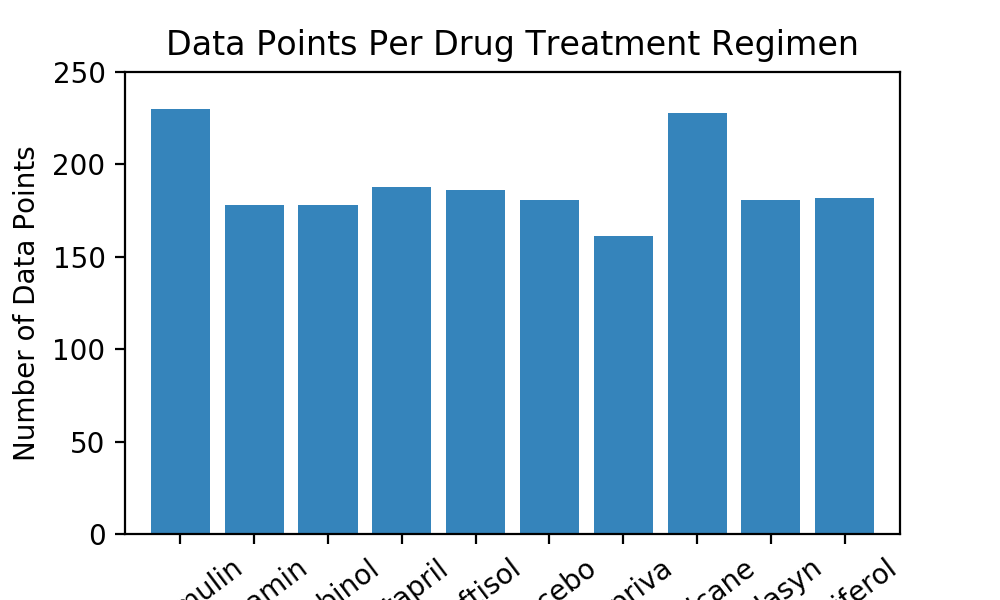

In [150]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(bar1))

tick_locations = [x for x in x_axis]

plt.figure(figsize=(5,3))
newplot = panbar.reset_index()

plt.bar(x_axis, panbar['Tumor Volume (mm3)'], alpha=0.90, align="center")
plt.xticks(tick_locations,newplot['Drug Regimen'],rotation="37")

plt.xlim(-0.75, len(bar1)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

In [75]:
bygender = merged_df.groupby("Sex").count()
bygender

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Sex                                                                 
Female       935        935                 935               935   
Male         958        958                 958               958   

        Drug Regimen  Age_months  Weight (g)  
Sex                                           
Female           935         935         935  
Male             958         958         958

In [76]:
labels = [merged_df['Sex'].unique()]
newlist = list(bygender.index)
newlist

['Female', 'Male']

In [77]:
sizes = [bygender["Mouse ID"]]
sizes

[Sex
 Female    935
 Male      958
 Name: Mouse ID, dtype: int64]

/Users/kelbywilson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


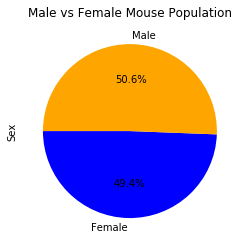

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["blue", "orange"]
plt.pie(sizes, labels=newlist, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

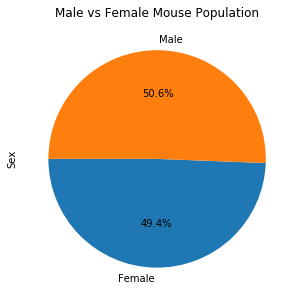

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie2 = bygender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

In [134]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [151]:
complete_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')

#Four of the most promising treatment regimens
grouped_df = complete_df.groupby(['Drug Regimen'])
promising_df = grouped_df[["Timepoint", "Tumor Volume (mm3)"]].mean()
promising_df

Timepoint  Tumor Volume (mm3)
Drug Regimen                               
Capomulin     21.565217           40.675741
Ceftamin      19.747191           52.591172
Infubinol     18.174157           52.884795
Ketapril      19.707447           55.235638
Naftisol      19.623656           54.331565
Placebo       18.674033           54.033581
Propriva      16.863354           52.322552
Ramicane      21.425439           40.216745
Stelasyn      19.226519           54.233149
Zoniferol     19.368132           53.236507

In [141]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

cap_df = complete_df.loc[complete_df["Drug Regimen"] == "Capomulin",:]
cap_df1 = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_tumor = pd.DataFrame(cap_df1)
cap_merge = pd.merge(cap_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
cap_final_tumor = cap_merge["Tumor Volume (mm3)"]

cap_quartiles = cap_final_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*iqr)
cap_upper_bound = cap_upperq + (1.5*iqr)

print(f"Capomulin tumor volume values below {cap_lower_bound} and above {cap_upper_bound}  could be outliers.")


Capomulin tumor volume values below 20.70456164999999 and above 51.83201549  could be outliers.


In [138]:
inf_df = complete_df.loc[complete_df["Drug Regimen"] == "Infubinol",:]
inf_df1 = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_tumor = pd.DataFrame(inf_df1)
inf_merge = pd.merge(inf_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
inf_final_tumor = inf_merge["Tumor Volume (mm3)"]

inf_quartiles = inf_final_tumor.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*iqr)
inf_upper_bound = inf_upperq + (1.5*iqr)

print(f"Infubinol tumor volume values below {inf_lower_bound} and above {inf_upper_bound}  could be outliers.")

Infubinol tumor volume values below 36.83290494999999 and above 82.74144559000001  could be outliers.


In [139]:
prop_df = complete_df.loc[complete_df["Drug Regimen"] == "Propriva",:]
prop_df1 = prop_df.groupby('Mouse ID').max()['Timepoint']
prop_tumor = pd.DataFrame(prop_df1)
prop_merge = pd.merge(prop_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
prop_final_tumor = prop_merge["Tumor Volume (mm3)"]

prop_quartiles = prop_final_tumor.quantile([.25,.5,.75])
prop_lowerq = prop_quartiles[0.25]
prop_upperq = prop_quartiles[0.75]
iqr = prop_upperq-prop_lowerq
prop_lower_bound = prop_lowerq - (1.5*iqr)
prop_upper_bound = prop_upperq + (1.5*iqr)

print(f"Propriva tumor volume values below {prop_lower_bound} and above {prop_upper_bound}  could be outliers.")

Propriva tumor volume values below 28.95110303500001 and above 82.742745555  could be outliers.


In [140]:
ram_df = complete_df.loc[complete_df["Drug Regimen"] == "Ramicane",:]
ram_df1 = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_tumor = pd.DataFrame(ram_df1)
ram_merge = pd.merge(ram_tumor, complete_df, on=("Mouse ID","Timepoint"),how="left")
ram_final_tumor = ram_merge["Tumor Volume (mm3)"]

ram_quartiles = ram_final_tumor.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*iqr)
ram_upper_bound = ram_upperq + (1.5*iqr)

print(f"Ramicane tumor volume values below {ram_lower_bound} and above {ram_upper_bound}  could be outliers.")

Ramicane tumor volume values below 17.912664470000003 and above 54.30681135  could be outliers.


<IPython.core.display.Javascript object>


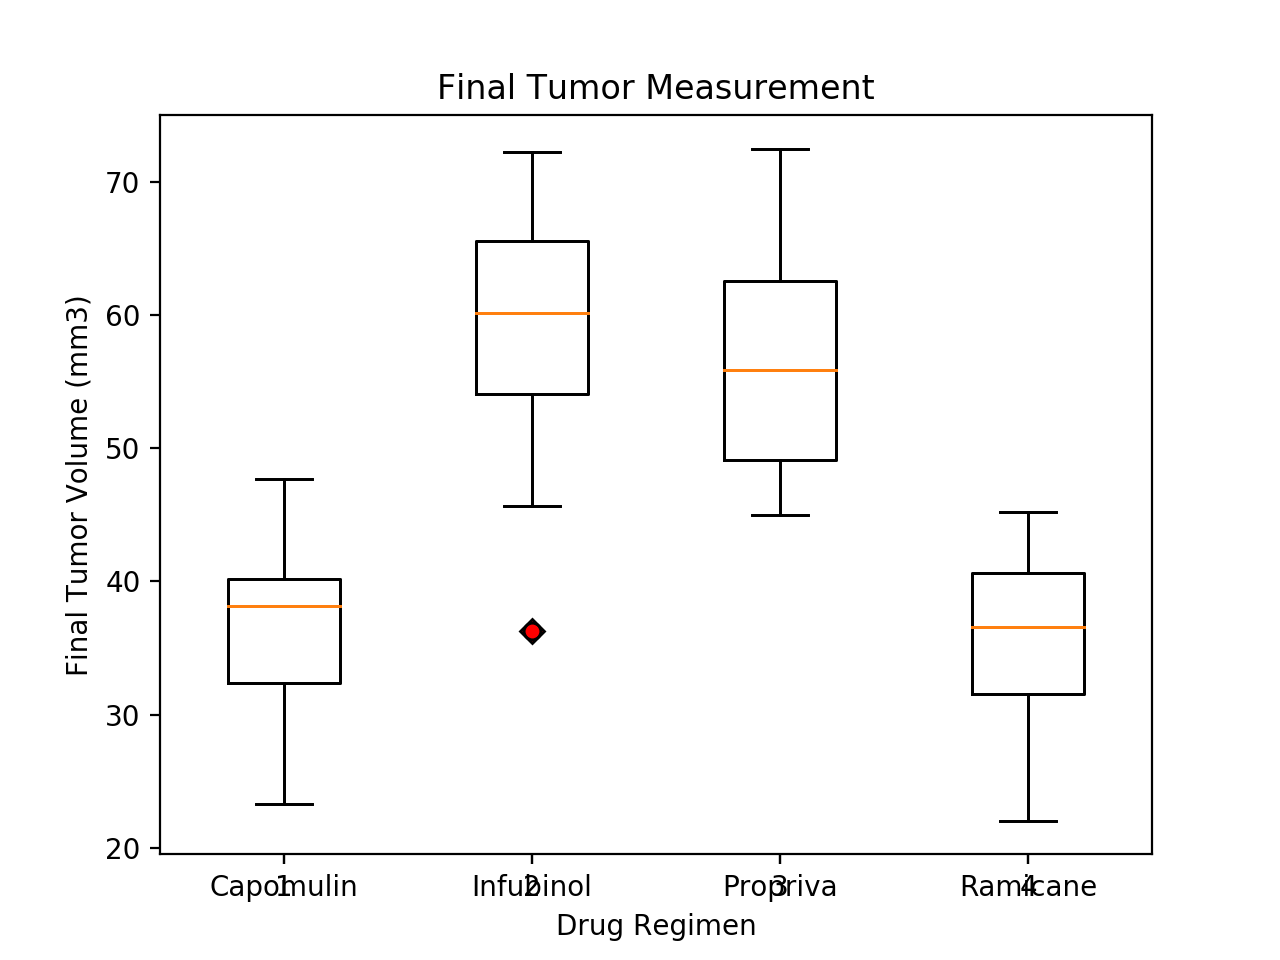

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = [cap_final_tumor, inf_final_tumor, prop_final_tumor, ram_final_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Measurement')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(box_plot_df, flierprops=red_diamond)

ax1.boxplot(box_plot_df, labels=["Capomulin","Infubinol","Propriva", "Ramicane",])

plt.show()

<IPython.core.display.Javascript object>


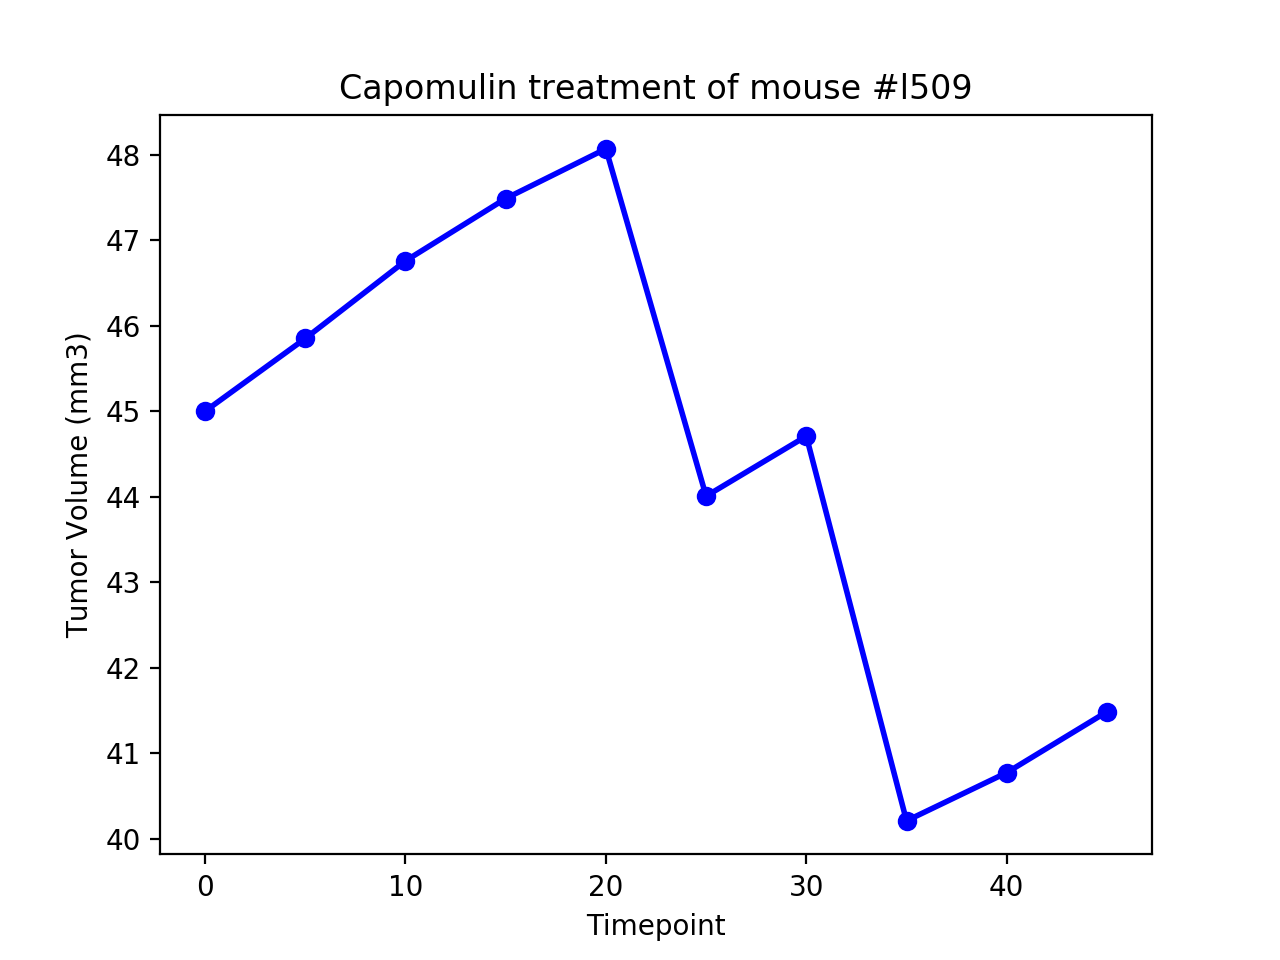

In [126]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

#Four of the most promising treatment regimens
grouped_df = complete_df.groupby(['Drug Regimen'])
criteria_df = grouped_df[["Timepoint", "Tumor Volume (mm3)"]].mean()
cap_df = complete_df.loc[complete_df["Drug Regimen"] == "Capomulin",:]

capline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
capline_df.head()

cap_time = capline_df["Timepoint"]
cap_tumor= capline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse #l509')
plt.plot(cap_time, cap_tumor,linewidth=2, marker="o", color="blue")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

<IPython.core.display.Javascript object>


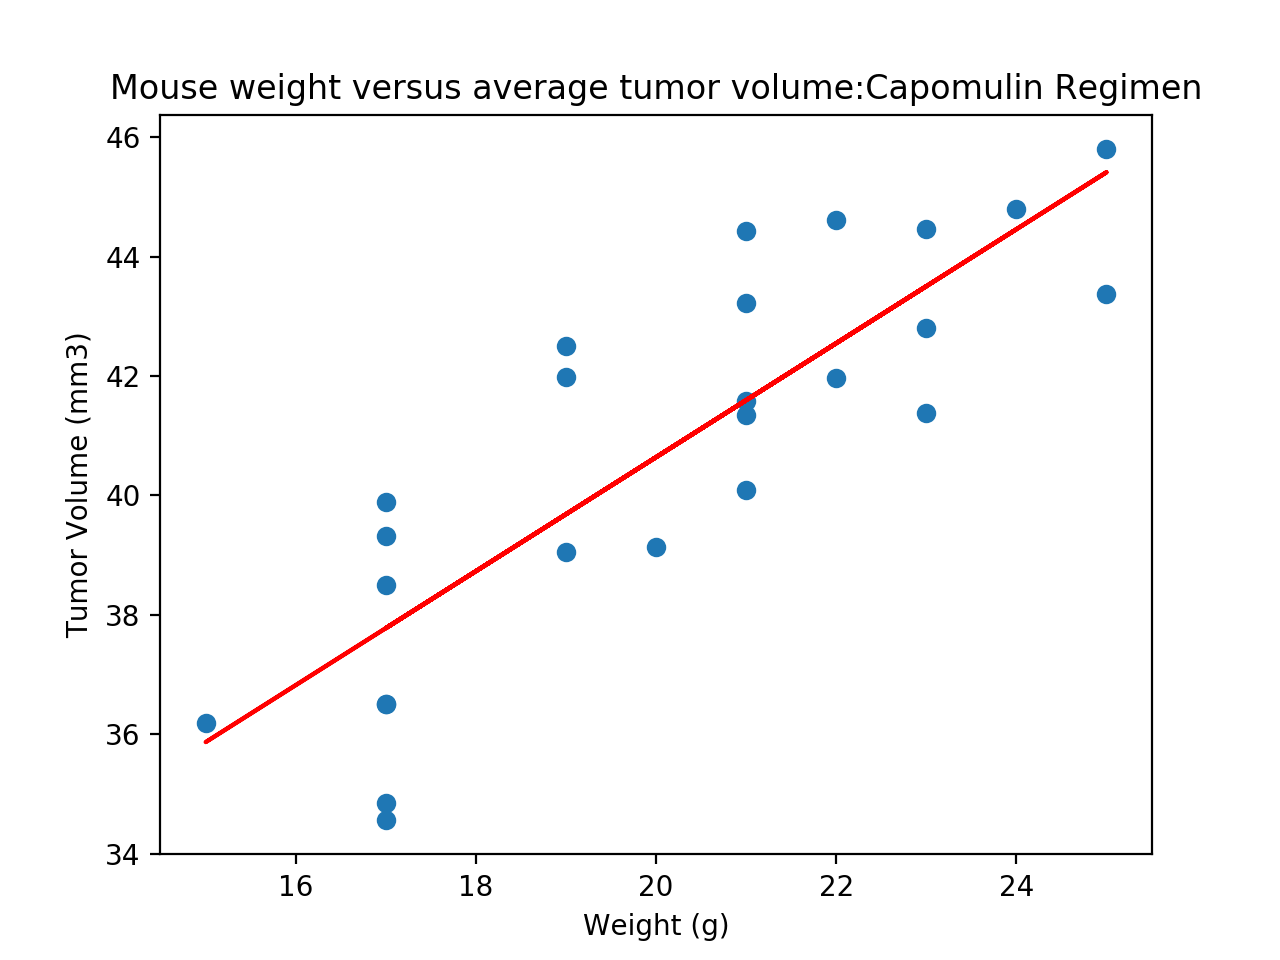

In [115]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.title('Mouse weight versus average tumor volume:Capomulin Regimen')
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

In [107]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)

print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


<IPython.core.display.Javascript object>


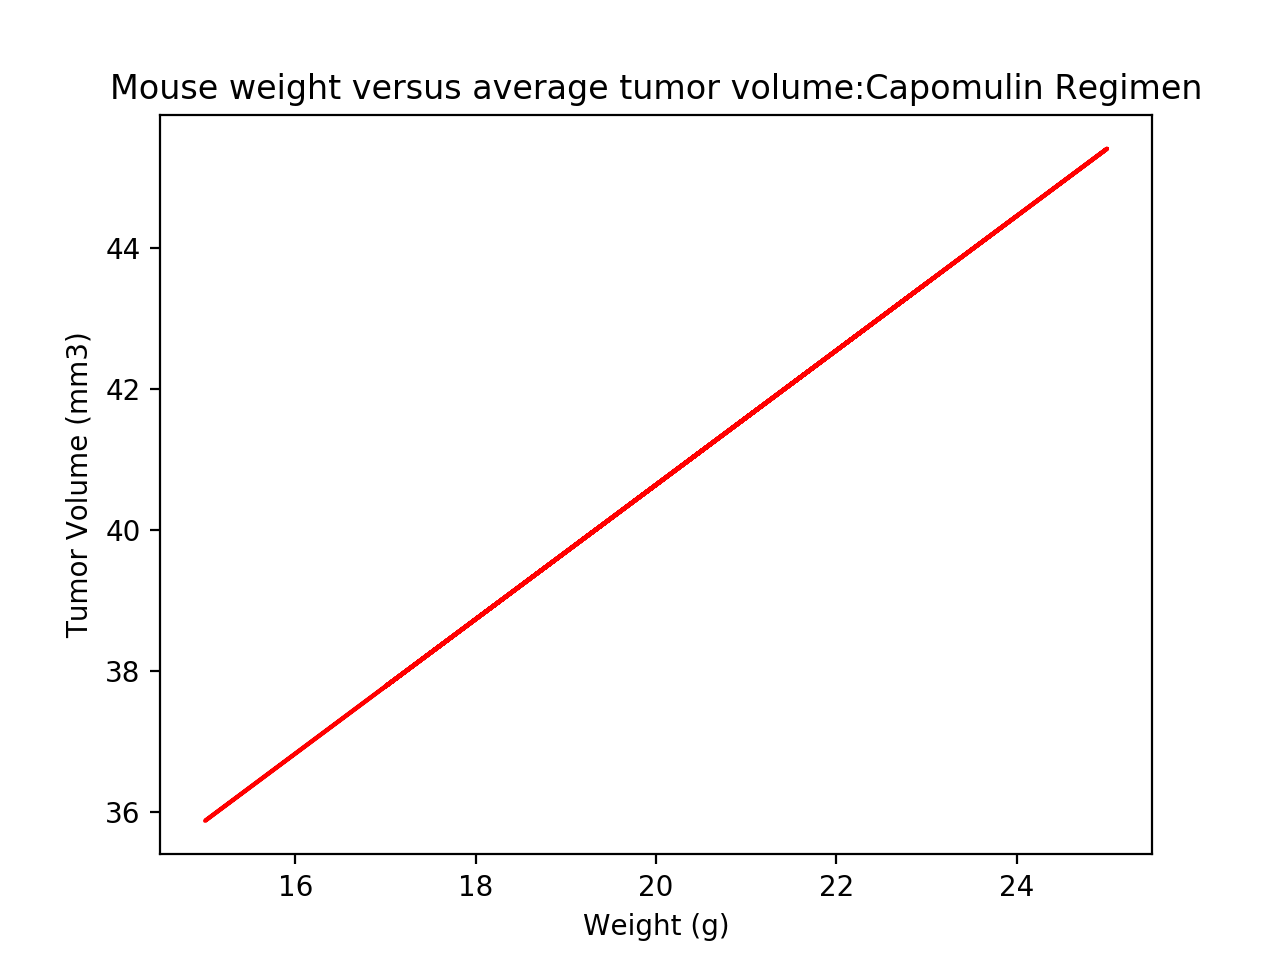

In [127]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Mouse weight versus average tumor volume:Capomulin Regimen')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()